---
---
# **`CASE STUDY - 1` :: Healthcare Provider Fraudulent Detection**

<img src="Display_Pic.png" alt="drawing" width="950"/>

---
---


**This notebook contains the extensive data analysis (specific to Input & Output patients) performed on the publicly available dataset at [Kaggle](https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis) with the intent:**
- To gain better understanding of the dataset from different levels.
- To explore the dataset in order to uncover the potential hidden patterns.
- And, to find the answers of various WHYs.


**Kindly checkout below link for gaining BUSINESS related insights about this problem:**

- [Deck : Detailed Explanation](https://docs.google.com/presentation/d/1Thuw_eZskafkl9W3xYuEVsjgTJKFeEkzEfAmczH96Uw/)


**Kindly checkout below link for TECHNICAL description about this problem:**

- [Technical Document](https://docs.google.com/document/d/10z9xbn4dZWkforlAszCDaa1M0roAW-MOf2pjJHSnEXk/)

# **`Notebook Contents`**

>[CASE STUDY - 1 :: Healthcare Provider Fraudulent Detection](#scrollTo=naPWqtUVigTd)

>[Notebook Contents](#scrollTo=PHkkU2ExpgPR)

>>[Downloading_Train_Data_Files](#scrollTo=Ry-TJ1anmAdO)

>>[Importing_Libraries](#scrollTo=ThPD8j4PnuVH)

>>[Importing_Dataset](#scrollTo=c16_htZKnucm)

>>[Records_counts_for_In-patient_&_Out-patient_Data](#scrollTo=25UO_fXHte6_)

>>[Exploring_the_In-patients_Data](#scrollTo=8gdwcaxyBGAl)

>>>[Q1. What is the relationship b/w Amount of Insurance Claim Reimbursed v/s Claim Clearance Days?](#scrollTo=AGUFcJj4BGAs)

>>>[Q2. What is the relationship b/w Claimed and Admitted Durations with Re-imbursed Amount?](#scrollTo=PBOIHXwbBGA0)

>>>[Q3. What is the relationship b/w DeductibleAmtPaid and Re-imbursed Amount?](#scrollTo=phUsYT9MBGA7)

>>>[Q4. What is the relationship of Providers with Total number of claims filed & Re-imbursed Amount?](#scrollTo=oi5iGZrGBGBC)

>>[Exploring_the_Out-patients_Data](#scrollTo=YhdIn4Q7BGBH)

>>>[Q5. What is the relationship b/w Claim Duration and Re-imbursed Amount?](#scrollTo=7YPDOlidBGBS)

>>>[Q5.1 What is the relationship b/w Claim Duration and Co-Payment?](#scrollTo=jHyLnCz2BGBW)

>>>[Q6. What is the relationship b/w Amount of Insurance Claim Reimbursed v/s Claim Clearance Days?](#scrollTo=P7_mvcShBGBY)

>>>[Q7. What is the relationship b/w DeductibleAmtPaid and Re-imbursed Amount?](#scrollTo=--UTxA0sBGBl)

>>>[Q8. What is the relationship of Providers with Total number of claims filed & Re-imbursed Amount?](#scrollTo=Z16ueuMgBGBs)

>>[SUMMARY](#scrollTo=xKB5UDZvBGBw)



## **Downloading_Train_Data_Files**

In [ ]:
## TRAIN set files
!gdown 12zSQN2FOxmuXFhz2xzPNussPisEfVP5w
!gdown 13XyBakfHiG-BNQPrYFXAHlsOcfICOTpx
!gdown 1dLxl4vkykPcm4Zj0abYR0Ohr7STQHg-1
!gdown 1rFER-7VuYb7GfCYeJrfxPidgK0lwqw3R

## **Importing_Libraries**

In [1]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',30)
label_font_dict = {'family':'sans-serif','size':13.5,'color':'brown','style':'italic'}
title_font_dict = {'family':'sans-serif','size':16.5,'color':'Blue','style':'italic'}

## **Importing_Dataset**

In [3]:
train_bene_df = pd.read_csv("Dataset/Train/Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv("Dataset/Train/Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv("Dataset/Train/Train_Outpatientdata-1542865627584.csv")

## ***Records_counts_for_In-patient_&_Out-patient_Data***

- **In-patients**

In [4]:
train_ip_df.shape

(40474, 30)

In [5]:
train_ip_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [6]:
train_ip_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [7]:
print("### Number of records where patient gets admitted --> {} ###".format(train_ip_df.shape[0]))

### Number of records where patient gets admitted --> 40474 ###


- **Out-patients**

In [8]:
train_op_df.shape

(517737, 27)

In [9]:
train_op_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [10]:
train_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [11]:
print("### Number of records where patients didn't gets admitted --> {} ###".format(train_op_df.shape[0]))

### Number of records where patients didn't gets admitted --> 517737 ###


- **Patient IDs who medicated with or without admission**

In [12]:
ip_bene_unq = set(train_ip_df['BeneID'])
op_bene_unq = set(train_op_df['BeneID'])

In [13]:
len(ip_bene_unq), len(op_bene_unq)

(31289, 133980)

- **Number of patients who either are in-patients or out-patients**

In [14]:
only_in_patients = ip_bene_unq.intersection(op_bene_unq)
len(only_in_patients)

26713

In [15]:
print("### Only admitted in-patients --> {} ###".format(len(only_in_patients)))

### Only admitted in-patients --> 26713 ###


In [16]:
only_out_patients = op_bene_unq.difference(ip_bene_unq)
len(only_out_patients)

107267

In [17]:
print("### Only out-patients --> {} ###".format(len(only_out_patients)))

### Only out-patients --> 107267 ###


In [18]:
patients_counts = pd.DataFrame([len(only_in_patients), len(only_out_patients)]).T
patients_counts.columns = ['Only In-patients', 'Only Out-patients']
patients_counts

,Only In-patients,Only Out-patients
0,26713,107267


In [19]:
tot_patients = len(only_in_patients) + len(only_out_patients)
tot_patients

133980

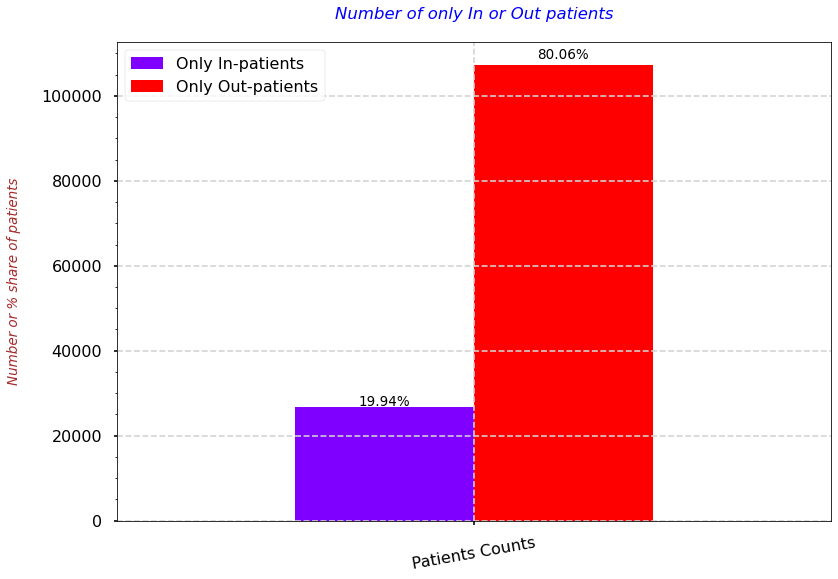

In [20]:
# Here, I'm displaying the number of only in-patients and out-patients
with plt.style.context('seaborn-poster'):
    fig = patients_counts.plot(kind='bar',colormap='rainbow')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_patients,2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xticks(labels=["Patients Counts"], ticks=[0], rotation=10)
    plt.ylabel("Number or % share of patients\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Number of only In or Out patients\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can decude that 80% of the patients gets medicared without even admission.

## ***Exploring_the_In-patients_Data***

In [21]:
train_ip_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,2859,1068.0,2009-10-02,812,2851,2762,53550,V0254,V1005,5173,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,79902,1068.0,2009-11-06,228,42823,4148,4019,3970,4241,V1042,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,78605,1068.0,2009-11-22,302,4280,3963,5859,4019,40390,4111,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,7802,1068.0,2009-12-18,309,7802,5859,496,2809,V1254,42822,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- **NULL records in the in-patients data**

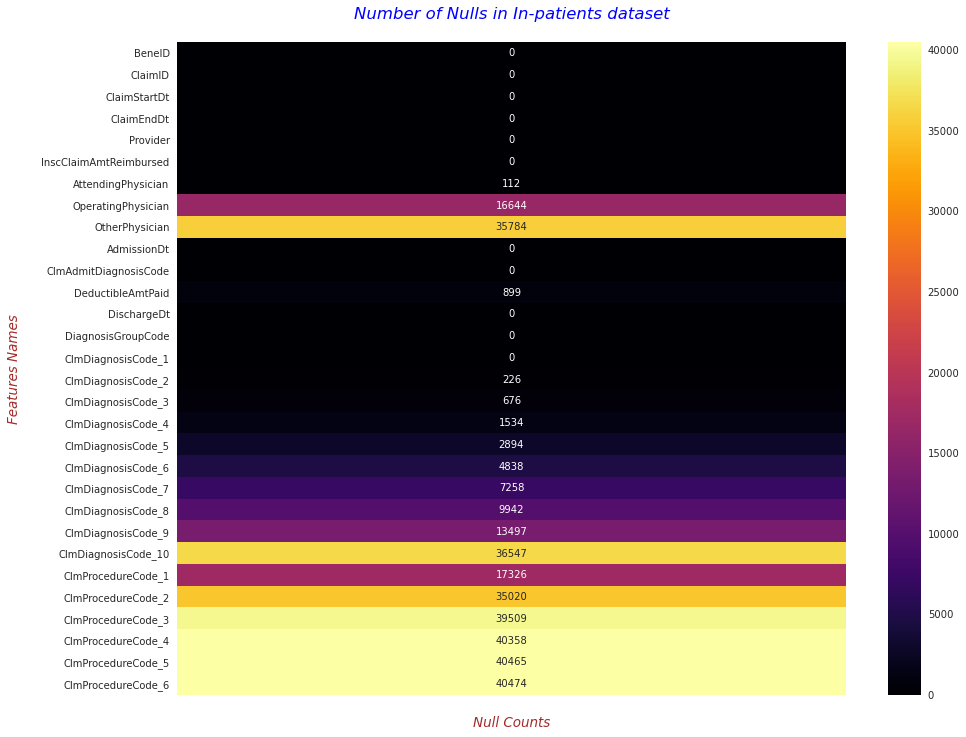

In [22]:
# Here, I'm displaying the number of only in-patients and out-patients
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))
    fig = sns.heatmap(pd.DataFrame(train_ip_df.isnull().sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True)
    # Providing the labels and title to the graph
    plt.xticks(labels=[" "], ticks=[0])
    plt.xlabel("Null Counts", fontdict=label_font_dict)
    plt.ylabel("Features Names\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Number of Nulls in In-patients dataset\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can see that the majority of the ProcedureCodes are having NULLS. And, ClmDiagnosisCode_10 is very rare among Patients.

- **Added Flag for indicating whether beneficiary admitted or not?**

In [23]:
train_ip_df["Admitted?"] = 1

- **Added Claim_Clearance_Days**

In [24]:
train_ip_df['ClaimStartDt'] = pd.to_datetime(train_ip_df['ClaimStartDt'], format="%Y-%m-%d")
train_ip_df['ClaimEndDt'] = pd.to_datetime(train_ip_df['ClaimEndDt'], format="%Y-%m-%d")

In [25]:
train_ip_df['Claim_Duration'] = (train_ip_df['ClaimEndDt'] - train_ip_df['ClaimStartDt']).dt.days

In [26]:
train_ip_df['Claim_Duration'].describe()

count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: Claim_Duration, dtype: float64

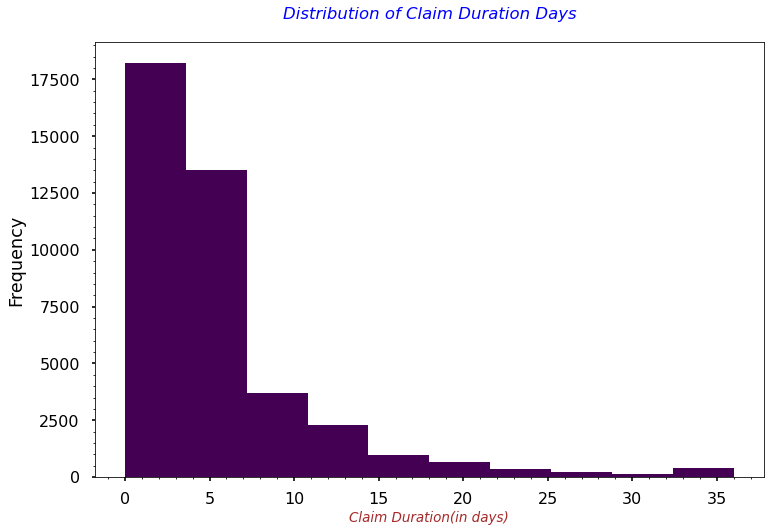

In [27]:
# Here, I'm displaying the number of only in-patients and out-patients
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    train_ip_df['Claim_Duration'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can decude that the majority of the claims filed for less than 7 days.


- **Percentiles values**

In [28]:
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(train_ip_df["Claim_Duration"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 1.0
Percentile --> 20.0 and its value is --> 2.0
Percentile --> 25.0 and its value is --> 2.0
Percentile --> 30.0 and its value is --> 3.0
Percentile --> 40.0 and its value is --> 3.0
Percentile --> 50.0 and its value is --> 4.0
Percentile --> 60.0 and its value is --> 5.0
Percentile --> 70.0 and its value is --> 6.0
Percentile --> 75.0 and its value is --> 7.0
Percentile --> 80.0 and its value is --> 8.0
Percentile --> 90.0 and its value is --> 12.0
Percentile --> 91.0 and its value is --> 13.0
Percentile --> 92.0 and its value is --> 14.0
Percentile --> 93.0 and its value is --> 14.0
Percentile --> 94.0 and its value is --> 15.0
Percentile --> 95.0 and its value is --> 17.0
Percentile --> 96.0 and its value is --> 18.0
Percentile --> 97.0 and its value is --> 21.0
Percentile --> 98.0 and its value is --> 25.0
Percentile --> 99.0 and its value is --> 32.0
Percentile --> 99.9 and its value is --> 35.0
Percentile --> 99.99 and its value is --> 35

**`OBSERVATION`**
* From the results, we can say that 95% of the claims are filed for 17 days.

### **Q1. What is the relationship b/w Amount of Insurance Claim Reimbursed v/s Claim Clearance Days?**

In [29]:
unq_claim_duration_days = train_ip_df['Claim_Duration'].unique()
unq_claim_duration_days

array([ 6,  2,  3,  8, 17,  5,  4,  7,  1, 11, 35,  9, 15, 12, 24, 23, 14,
        0, 10, 13, 18, 19, 28, 16, 21, 26, 22, 32, 27, 20, 31, 25, 34, 30,
       29, 33, 36], dtype=int64)

In [30]:
tot_claims_filed_for_specific_days = pd.DataFrame(train_ip_df.groupby(['Claim_Duration'])['BeneID'].count())
tot_claims_filed_for_specific_days

,BeneID
Claim_Duration,
0,605
1,4599
2,6119
3,6899
4,4993
5,3579
6,2714
7,2210
8,1612


In [31]:
tot_insc_amount_for_claim_durations = pd.DataFrame(train_ip_df.groupby(['Claim_Duration'])['InscClaimAmtReimbursed'].sum())
tot_insc_amount_for_claim_durations

,InscClaimAmtReimbursed
Claim_Duration,
0,3925000
1,33356000
2,43987610
3,56477460
4,43932690
5,33962440
6,29057610
7,25537200
8,20637600


In [32]:
claim_clearance_amts = pd.merge(left=tot_claims_filed_for_specific_days, right=tot_insc_amount_for_claim_durations,
                                how='inner',
                                left_on=tot_claims_filed_for_specific_days.index,
                                right_on=tot_insc_amount_for_claim_durations.index)

claim_clearance_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']
claim_clearance_amts.head()

,Claim_durations_in_days,Total_claims,All_Claims_Total_Amount
0,0,605,3925000
1,1,4599,33356000
2,2,6119,43987610
3,3,6899,56477460
4,4,4993,43932690


In [33]:
claim_clearance_amts['Avg_Claim_Insc_Amount'] = np.round(claim_clearance_amts['All_Claims_Total_Amount']/claim_clearance_amts['Total_claims'],2)

In [34]:
claim_clearance_amts.head()

,Claim_durations_in_days,Total_claims,All_Claims_Total_Amount,Avg_Claim_Insc_Amount
0,0,605,3925000,6487.60
1,1,4599,33356000,7252.88
2,2,6119,43987610,7188.69
3,3,6899,56477460,8186.33
4,4,4993,43932690,8798.86


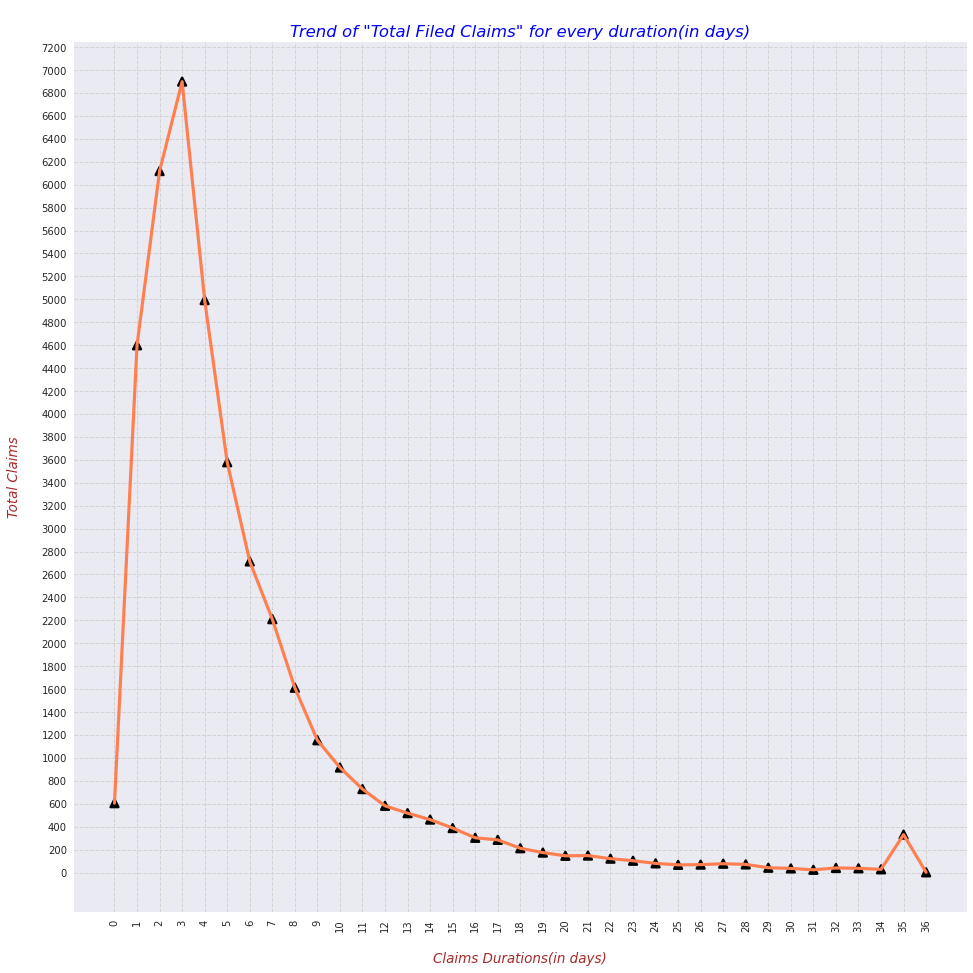

In [35]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,16))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Total_claims', 
                  color='k', markers="^", linestyles="")
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Total_claims', 
                  color='coral', markers="", linestyles="-")
     
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations(in days)", fontdict= label_font_dict)
    plt.ylabel("Total Claims\n", fontdict= label_font_dict)
    plt.yticks(np.arange(0,7500,200))
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Total Filed Claims" for every duration(in days)', fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above graph tells us that the most number of claims are filed for 3 days. And, there are very less number of claims for duration greater than 15.
    * However, we can witness a litter spike for 35 days of duration for claims.

* And, there are around 600 claims for which the duration is 0 that means Claim Start Date and End Date is same.

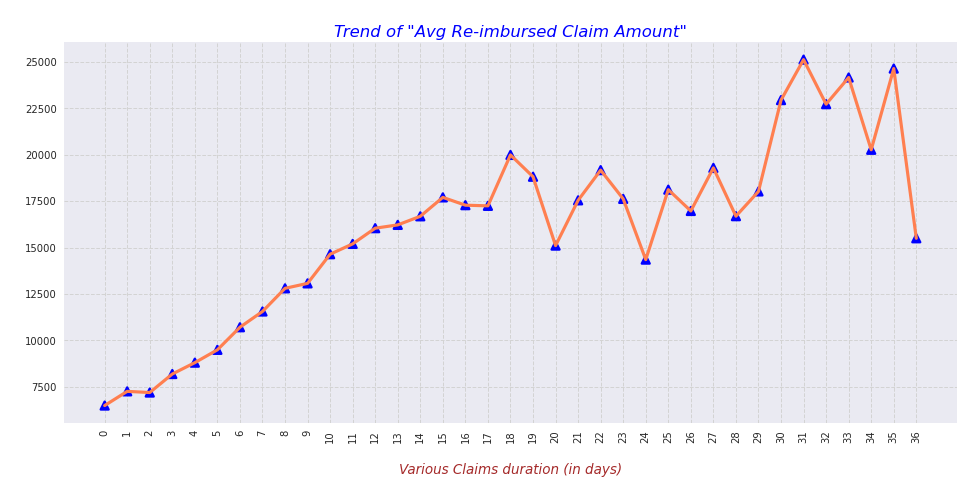

In [36]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='blue', markers="^", linestyles="")
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='coral', markers="", linestyles="-")
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nVarious Claims duration (in days)", fontdict= label_font_dict)
    plt.ylabel(" ", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Avg Re-imbursed Claim Amount"', fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above graph tells us that as the claim duration increases then the Avg Re-imbursed Amount also increases, however, as we have already seen that total number of claims are very less when duration is greater than 15 days.

* Another thing to look here is that if the duration is b/w [30-35] then the Average Re-imbursed amount is very high and reaches its maximum.

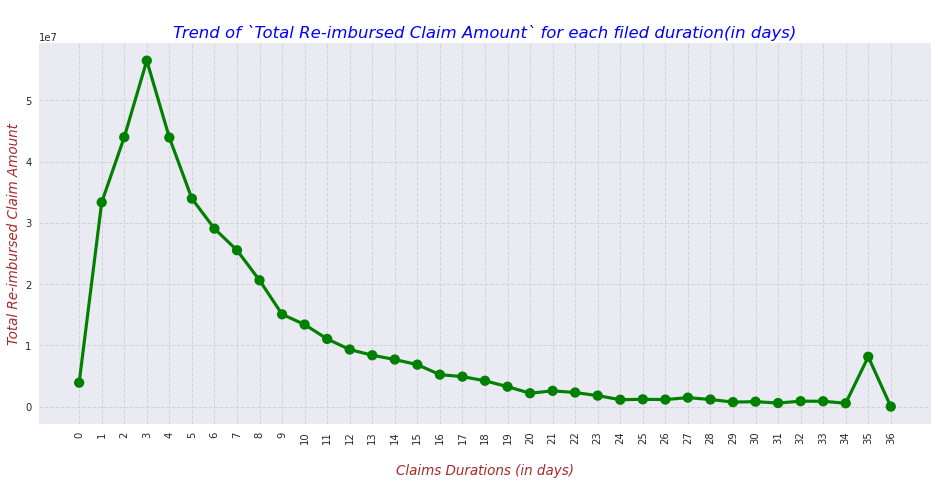

In [37]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='All_Claims_Total_Amount', color='green')
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations (in days)", fontdict= label_font_dict)
    plt.ylabel("Total Re-imbursed Claim Amount", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("\nTrend of `Total Re-imbursed Claim Amount` for each filed duration(in days)", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above graph tells us that the Total Re-imbursed Amount is the highest for 3 days claims

* And, for claims with durations from 12 to 34 the total re-imbursed amount is very less, however, for 35 days duration we can witness a clear spike that can be a potential sign of fraudulent.

### **Q2. What is the relationship b/w Claimed and Admitted Durations with Re-imbursed Amount?**

In [38]:
train_ip_df['DischargeDt'] = pd.to_datetime(train_ip_df['DischargeDt'], format="%Y-%m-%d")
train_ip_df['AdmissionDt'] = pd.to_datetime(train_ip_df['AdmissionDt'], format="%Y-%m-%d")

In [39]:
train_ip_df['Admitted_Days'] = train_ip_df['DischargeDt'] - train_ip_df['AdmissionDt']
train_ip_df['Admitted_Days'] = train_ip_df['Admitted_Days'].dt.days

In [40]:
claims_with_diff_admitted_and_claimed_dur = train_ip_df[~(train_ip_df['Claim_Duration'] == train_ip_df['Admitted_Days'])]
claims_with_diff_admitted_and_claimed_dur

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?,Claim_Duration,Admitted_Days
35,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,4439,1068.0,2009-01-09,255,99662,...,V854,4280,E9320,04185,412,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,1,9,6
2163,BENE18587,CLM37486,2009-02-10,2009-02-11,PRV52020,3000,PHY359519,NaN,NaN,2009-02-08,2859,1068.0,2009-02-11,804,2859,...,4168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,3
3864,BENE24807,CLM82212,2008-12-31,2009-01-11,PRV54111,13000,PHY360669,PHY408812,NaN,2008-12-31,55221,1068.0,2009-01-09,345,56889,...,42731,9974,4589,27801,25000,NaN,5369.0,NaN,NaN,NaN,NaN,NaN,1,11,9
4422,BENE26849,CLM70032,2009-10-02,2009-10-07,PRV56647,12000,PHY332134,NaN,NaN,2009-09-29,2930,1068.0,2009-10-07,867,0389,...,42820,486,25000,4589,42833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,8
5400,BENE30503,CLM67400,2009-09-12,2009-09-14,PRV54228,3000,PHY364179,NaN,NaN,2009-09-09,5789,1068.0,2009-09-14,376,56211,...,4019,3004,41401,5771,2724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,5
5647,BENE31388,CLM40738,2009-03-07,2009-03-08,PRV51490,16000,PHY325912,PHY325912,NaN,2009-03-02,25070,1068.0,2009-03-08,242,25070,...,25000,41401,40391,99591,73017,40390,8411.0,NaN,NaN,NaN,NaN,NaN,1,1,6
5869,BENE32209,CLM58624,2009-07-10,2009-07-17,PRV51249,6000,PHY326642,PHY383790,PHY372651,2009-07-06,5990,1068.0,2009-07-17,862,03842,...,99591,2900,78550,27651,NaN,NaN,9921.0,NaN,NaN,NaN,NaN,NaN,1,7,11
7752,BENE39346,CLM82211,2009-02-18,2009-02-26,PRV54065,19000,PHY337531,PHY341176,NaN,2009-02-18,44421,1068.0,2009-02-23,254,4422,...,44021,V1582,2724,25040,4439,27801,3712.0,NaN,NaN,NaN,NaN,NaN,1,8,5
7828,BENE39685,CLM47198,2009-04-20,2009-04-22,PRV53705,600,PHY416391,PHY356670,NaN,2009-04-16,78903,1068.0,2009-04-22,348,78720,...,78321,5772,71590,5601,2724,NaN,9390.0,NaN,NaN,NaN,NaN,NaN,1,2,6
7869,BENE39802,CLM73187,2009-11-01,2009-11-05,PRV52100,3000,PHY366670,PHY348391,NaN,2009-10-24,5780,1068.0,2009-11-05,349,53140,...,25000,78720,4280,33394,40390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,12


In [41]:
claims_with_diff_admitted_and_claimed_dur['InscClaimAmtReimbursed'].sum()

671400

**`OBSERVATION`**
* The above table tells us that there are 49 claims whose Claimed Duration and Admitted Duration are different.

* And, for these 49 claims the total re-imbursed amount is around 0.67 Million. So, doesn't look like an issue here as the admitted days can be greater than claimed duration based upon the plan bought by the beneficiary.

* **Lets check whether claimed duration is greater then admitted duration**

In [42]:
claims_with_diff_admitted_and_claimed_dur[claims_with_diff_admitted_and_claimed_dur['Claim_Duration']  > \
                                          claims_with_diff_admitted_and_claimed_dur['Admitted_Days']]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?,Claim_Duration,Admitted_Days
35,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,4439,1068.0,2009-01-09,255,99662,...,V854,4280,E9320,04185,412,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,1,9,6
3864,BENE24807,CLM82212,2008-12-31,2009-01-11,PRV54111,13000,PHY360669,PHY408812,NaN,2008-12-31,55221,1068.0,2009-01-09,345,56889,...,42731,9974,4589,27801,25000,NaN,5369.0,NaN,NaN,NaN,NaN,NaN,1,11,9
7752,BENE39346,CLM82211,2009-02-18,2009-02-26,PRV54065,19000,PHY337531,PHY341176,NaN,2009-02-18,44421,1068.0,2009-02-23,254,4422,...,44021,V1582,2724,25040,4439,27801,3712.0,NaN,NaN,NaN,NaN,NaN,1,8,5
9094,BENE44545,CLM82209,2009-01-18,2009-01-27,PRV52843,14000,PHY365072,NaN,NaN,2009-01-18,85181,1068.0,2009-01-25,023,85202,...,2449,3485,78720,5070,5990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,7
9974,BENE47786,CLM82208,2009-05-27,2009-06-04,PRV52828,14000,PHY391167,NaN,NaN,2009-05-27,486,1068.0,2009-06-01,166,486,...,V140,27652,53081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8,5
17060,BENE73681,CLM82213,2009-02-10,2009-02-21,PRV54354,11000,PHY397703,NaN,PHY390453,2009-02-10,78079,1068.0,2009-02-18,315,41071,...,5849,42831,5853,28860,V4502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,11,8
18267,BENE78133,CLM82210,2009-01-02,2009-01-05,PRV53461,20000,PHY331754,PHY426843,NaN,2009-01-02,72981,1068.0,2009-01-03,228,44422,...,NaN,NaN,NaN,NaN,NaN,NaN,387.0,NaN,NaN,NaN,NaN,NaN,1,3,1
21298,BENE88968,CLM82205,2009-02-23,2009-02-28,PRV52045,24000,PHY339550,PHY359571,NaN,2009-02-23,78650,1068.0,2009-02-25,304,V5332,...,42741,V8536,4271,4148,4275,NaN,54.0,NaN,NaN,NaN,NaN,NaN,1,5,2
26395,BENE107828,CLM82216,2009-01-01,2009-01-22,PRV55018,19000,PHY364322,PHY320450,NaN,2009-01-01,78900,1068.0,2009-01-19,439,5758,...,41071,496,5990,5856,2720,486,5123.0,7850.0,NaN,NaN,NaN,NaN,1,21,18
27053,BENE110116,CLM82217,2009-02-09,2009-03-17,PRV56268,20000,PHY400645,PHY408610,NaN,2009-02-09,25010,1068.0,2009-03-16,642,25080,...,42789,42731,56881,5184,73007,NaN,3950.0,NaN,NaN,NaN,NaN,NaN,1,36,35


In [43]:
claims_with_diff_admitted_and_claimed_dur[claims_with_diff_admitted_and_claimed_dur['Claim_Duration']  > \
                                          claims_with_diff_admitted_and_claimed_dur['Admitted_Days']]['InscClaimAmtReimbursed'].sum()

274000

**`OBSERVATION`**
* The above table tells us that 17 claims out of 49 have Claimed Duration greater than the Admitted Duration.

* And, for these 17 claims the total re-imbursed amount is around 0.27 Million. For now, I'll keep this feature but my initial look says that it won't be much of a use.

### **Q3. What is the relationship b/w DeductibleAmtPaid and Re-imbursed Amount?**

In [44]:
no_of_claim_with_no_copay = train_ip_df[train_ip_df['DeductibleAmtPaid'].isna()].shape[0]
no_of_claim_with_no_copay

899

In [45]:
no_of_claim_with_copay = train_ip_df[~train_ip_df['DeductibleAmtPaid'].isna()].shape[0]
no_of_claim_with_copay

39575

In [46]:
percent_of_no_copay_claims = round((no_of_claim_with_no_copay / (no_of_claim_with_copay + no_of_claim_with_no_copay)) * 100,1)
print("### Percentage of claims with no co-payment or deductible --> {}% ###".format(percent_of_no_copay_claims))

### Percentage of claims with no co-payment or deductible --> 2.2% ###


In [47]:
re_imbursed_amt_for_no_copay = train_ip_df[train_ip_df['DeductibleAmtPaid'].isna()]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_for_no_copay

10690000

In [48]:
re_imbursed_amt_with_some_copay = train_ip_df[~train_ip_df['DeductibleAmtPaid'].isna()]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_with_some_copay

397607020

In [49]:
tot_sum_of_claims_with_copay = re_imbursed_amt_with_some_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)
tot_sum_of_claims_with_no_copay = re_imbursed_amt_for_no_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)

In [50]:
percent_of_tot_sum_no_copay_claims_amt = round(tot_sum_of_claims_with_no_copay * 100,1)
print("### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> {}% ###".\
      format(percent_of_tot_sum_no_copay_claims_amt))

### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> 2.6% ###


**`OBSERVATION`**
* The above table tells us that there are a 2% of total claims for which there is no co-payment.
    * And, for these 2% (or 899) of total claims the total re-imbursed amount is 10.6 Million that is 2.6% of the total re-imbursed amount.

In [51]:
# Here, updating the NULL values of DeductibleAmtPaid feature as 0
train_ip_df['DeductibleAmtPaid'].fillna(value=0.0, inplace=True)

### **Q4. What is the relationship of Providers with Total number of claims filed & Re-imbursed Amount?**

In [52]:
# How many unique providers are there in the dataset?
print("We have {} unique number of Providers in the in-patient dataset.".format(train_ip_df['Provider'].nunique()))

We have 2092 unique number of Providers in the in-patient dataset.


In [53]:
provider_tot_claims_filed = pd.DataFrame(train_ip_df.groupby(['Provider'])['ClaimID'].count())
provider_tot_reimbursed_amt = pd.DataFrame(train_ip_df.groupby(['Provider'])['InscClaimAmtReimbursed'].sum())

prv_tot_filed_claims_and_tot_reimb_amt = pd.merge(left=provider_tot_claims_filed, right=provider_tot_reimbursed_amt, how='inner',
                                                  left_on=provider_tot_claims_filed.index, right_on=provider_tot_reimbursed_amt.index)

prv_tot_filed_claims_and_tot_reimb_amt.columns = ['ProviderID', 'Tot_Claims_Filed', 'Tot_Re_Imbursed_Amt']
prv_tot_filed_claims_and_tot_reimb_amt.reset_index(drop=True,inplace=True)
prv_tot_filed_claims_and_tot_reimb_amt['Percentage_out_of_tot_reimb_amt'] = round((prv_tot_filed_claims_and_tot_reimb_amt['Tot_Re_Imbursed_Amt'] / train_ip_df['InscClaimAmtReimbursed'].sum()) * 100, 3)

provider_max_reimbursed_amt = pd.DataFrame(train_ip_df.groupby(['Provider'])['InscClaimAmtReimbursed'].max())
provider_max_reimbursed_amt.rename(columns={"InscClaimAmtReimbursed": "Max_Re_Imbursed_Amt"}, inplace=True)

prv_tot_filed_claims_tot_max_reimb_amt = pd.merge(left=prv_tot_filed_claims_and_tot_reimb_amt, 
                                                  right=provider_max_reimbursed_amt, how='inner',
                                                  left_on=prv_tot_filed_claims_and_tot_reimb_amt['ProviderID'], 
                                                  right_on=provider_max_reimbursed_amt.index)

prv_tot_filed_claims_tot_max_reimb_amt.drop(['key_0'], axis=1, inplace=True)
prv_tot_filed_claims_tot_max_reimb_amt['Diff_in_Tot_and_Max'] = prv_tot_filed_claims_tot_max_reimb_amt['Tot_Re_Imbursed_Amt'] - \
prv_tot_filed_claims_tot_max_reimb_amt['Max_Re_Imbursed_Amt']

prv_tot_filed_claims_tot_max_reimb_amt.head()

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
0,PRV51001,5,97000,0.024,42000,55000
1,PRV51003,62,573000,0.140,57000,516000
2,PRV51007,3,19000,0.005,10000,9000
3,PRV51008,2,25000,0.006,21000,4000
4,PRV51011,1,5000,0.001,5000,0


In [54]:
prv_tot_filed_claims_tot_max_reimb_amt.sort_values(by=['Diff_in_Tot_and_Max','Max_Re_Imbursed_Amt','Percentage_out_of_tot_reimb_amt'],
                                                   axis=0, inplace=True,
                                                   ascending=[True, False, False])

In [55]:
prv_tot_filed_claims_tot_max_reimb_amt.head(60)

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
574,PRV52518,1,57000,0.014,57000,0
578,PRV52537,1,57000,0.014,57000,0
1767,PRV56664,1,57000,0.014,57000,0
1883,PRV57080,1,57000,0.014,57000,0
2012,PRV57399,1,57000,0.014,57000,0
1970,PRV57290,2,55000,0.013,55000,0
305,PRV51681,1,51000,0.012,51000,0
637,PRV52804,1,36000,0.009,36000,0
286,PRV51626,1,35000,0.009,35000,0
11,PRV51035,1,29000,0.007,29000,0


**`OBSERVATION`**
* The above table showing us the Provider Ids who only filed 1 or 2 claims and got the entire amount re-imbursed.
    * This, can be a potential sign of fraudulent because many small-small hospitals in rural area who don't have much facilities or equipments made fraud for benefits. Similar recently happened : refer here https://www.justice.gov/opa/pr/two-individuals-convicted-14-billion-health-care-fraud-scheme-involving-rural-hospitals

In [56]:
tot_re_imb_amt_for_prv_with_5orless_claims = prv_tot_filed_claims_tot_max_reimb_amt[prv_tot_filed_claims_tot_max_reimb_amt['Tot_Claims_Filed'] < 5] \
                                            ['Tot_Re_Imbursed_Amt'].sum()

pp_re_imb_amt_for_prv_with_5orless_claims = round((tot_re_imb_amt_for_prv_with_5orless_claims / train_ip_df['InscClaimAmtReimbursed'].sum()) * 100,2)
print("### Total Re-imbursed Amount for Providers with less than 5 filed claims is --> {} (17 Million). ###\n\
### And, this is {}% of Total Re-imbursed Claim Amount (408 Million). ###".format(tot_re_imb_amt_for_prv_with_5orless_claims, 
                                                                    pp_re_imb_amt_for_prv_with_5orless_claims))

### Total Re-imbursed Amount for Providers with less than 5 filed claims is --> 17012550 (17 Million). ###
### And, this is 4.17% of Total Re-imbursed Claim Amount (408 Million). ###


## ***Exploring_the_Out-patients_Data***

In [57]:
train_op_df.shape

(517737, 27)

- **NULL records in the in-patients data**

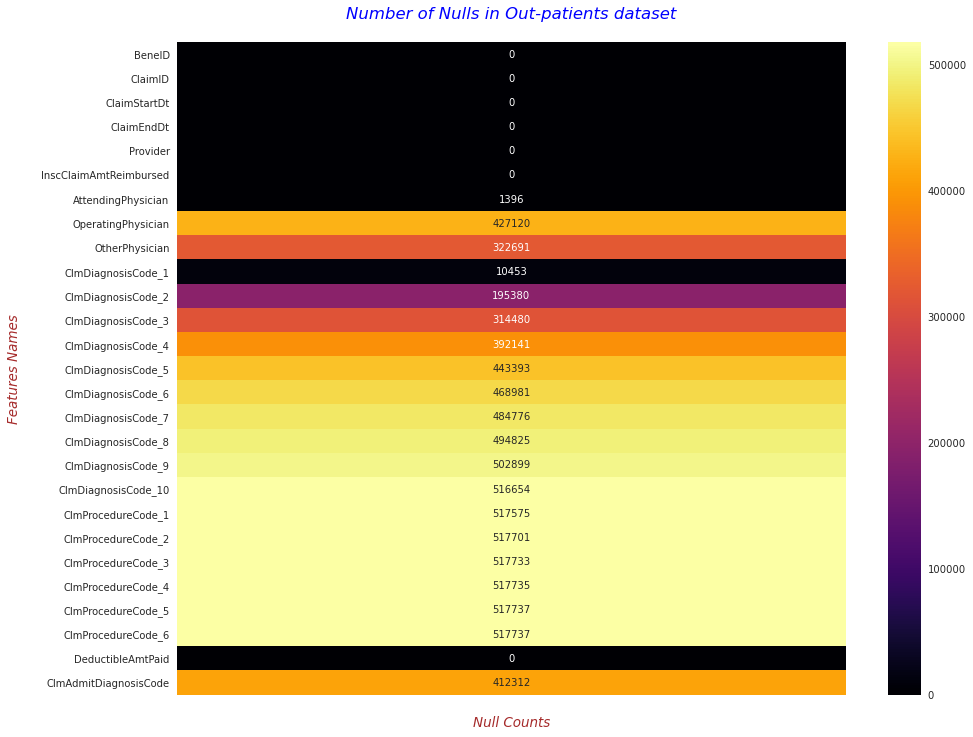

In [58]:
# Here, I'm displaying the number of only out-patients
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))
    fig = sns.heatmap(pd.DataFrame(train_op_df.isnull().sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True)
    # Providing the labels and title to the graph
    plt.xticks(labels=[" "], ticks=[0])
    plt.xlabel("Null Counts", fontdict=label_font_dict)
    plt.ylabel("Features Names\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Number of Nulls in Out-patients dataset\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can say that the majority of the ProcedureCodes are having NULLS. 

* ClmDiagnosisCode_9 & ClmDiagnosisCode_10 are very rare among Patients.

- **Added Flag for indicating whether beneficiary admitted or not?**

In [59]:
train_op_df["Admitted?"] = 0

- **Added Claim_Clearance_Days**

In [60]:
train_op_df['ClaimStartDt'] = pd.to_datetime(train_op_df['ClaimStartDt'], format="%Y-%m-%d")
train_op_df['ClaimEndDt'] = pd.to_datetime(train_op_df['ClaimEndDt'], format="%Y-%m-%d")

In [61]:
train_op_df['Claim_Duration'] = (train_op_df['ClaimEndDt'] - train_op_df['ClaimStartDt']).dt.days

In [62]:
train_op_df['Claim_Duration'].describe()

count    517737.000000
mean          1.420532
std           4.707387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: Claim_Duration, dtype: float64

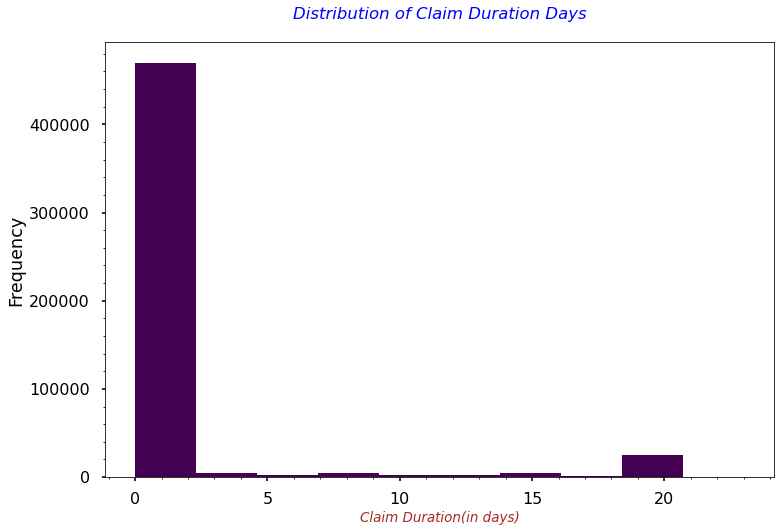

In [63]:
# Here, I'm displaying the number of only out-patients
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    train_op_df['Claim_Duration'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can decude that the majority of the claims filed for less than or equals to 2 days.


- **Percentiles values**

In [64]:
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(train_op_df["Claim_Duration"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 0.0
Percentile --> 20.0 and its value is --> 0.0
Percentile --> 25.0 and its value is --> 0.0
Percentile --> 30.0 and its value is --> 0.0
Percentile --> 40.0 and its value is --> 0.0
Percentile --> 50.0 and its value is --> 0.0
Percentile --> 60.0 and its value is --> 0.0
Percentile --> 70.0 and its value is --> 0.0
Percentile --> 75.0 and its value is --> 0.0
Percentile --> 80.0 and its value is --> 0.0
Percentile --> 90.0 and its value is --> 2.0
Percentile --> 91.0 and its value is --> 3.0
Percentile --> 92.0 and its value is --> 6.0
Percentile --> 93.0 and its value is --> 9.0
Percentile --> 94.0 and its value is --> 14.0
Percentile --> 95.0 and its value is --> 17.0
Percentile --> 96.0 and its value is --> 20.0
Percentile --> 97.0 and its value is --> 20.0
Percentile --> 98.0 and its value is --> 20.0
Percentile --> 99.0 and its value is --> 20.0
Percentile --> 99.9 and its value is --> 20.0
Percentile --> 99.99 and its value is --> 20.0
P

**`OBSERVATION`**
* From the results, we can say that 90% of the claims are filed for 2 days.

### **Q5. What is the relationship b/w Claim Duration and Re-imbursed Amount?**

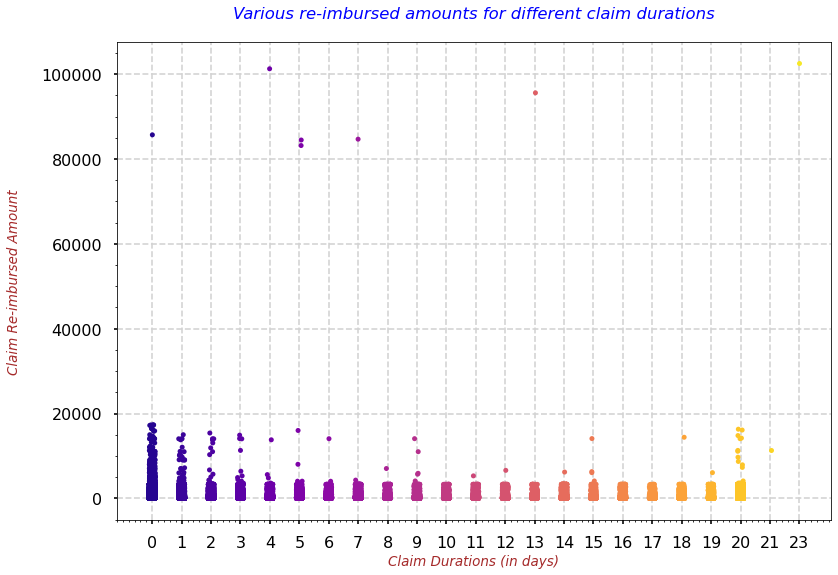

In [65]:
with plt.style.context("seaborn-poster"):
    sns.stripplot(x="Claim_Duration", y="InscClaimAmtReimbursed", data=train_op_df, palette="plasma")
    # Providing the labels and title to the graph
    plt.xlabel("Claim Durations (in days)", fontdict=label_font_dict)
    plt.ylabel("Claim Re-imbursed Amount\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Various re-imbursed amounts for different claim durations\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can decude that the majority of the claims filed have re-imbursed amount less than 20,000. And, very few have more than 1,00,000.

In [66]:
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(train_op_df["InscClaimAmtReimbursed"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 10.0
Percentile --> 20.0 and its value is --> 30.0
Percentile --> 25.0 and its value is --> 40.0
Percentile --> 30.0 and its value is --> 40.0
Percentile --> 40.0 and its value is --> 60.0
Percentile --> 50.0 and its value is --> 80.0
Percentile --> 60.0 and its value is --> 100.0
Percentile --> 70.0 and its value is --> 200.0
Percentile --> 75.0 and its value is --> 200.0
Percentile --> 80.0 and its value is --> 300.0
Percentile --> 90.0 and its value is --> 700.0
Percentile --> 91.0 and its value is --> 800.0
Percentile --> 92.0 and its value is --> 900.0
Percentile --> 93.0 and its value is --> 1000.0
Percentile --> 94.0 and its value is --> 1200.0
Percentile --> 95.0 and its value is --> 1500.0
Percentile --> 96.0 and its value is --> 1800.0
Percentile --> 97.0 and its value is --> 2100.0
Percentile --> 98.0 and its value is --> 2500.0
Percentile --> 99.0 and its value is --> 3300.0
Percentile --> 99.9 and its value is --> 3500.0
Percentile 

* **99.9% of claims have Re-imbursed amount less than 3500.**

### **Q5.1 What is the relationship b/w Claim Duration and Co-Payment?**

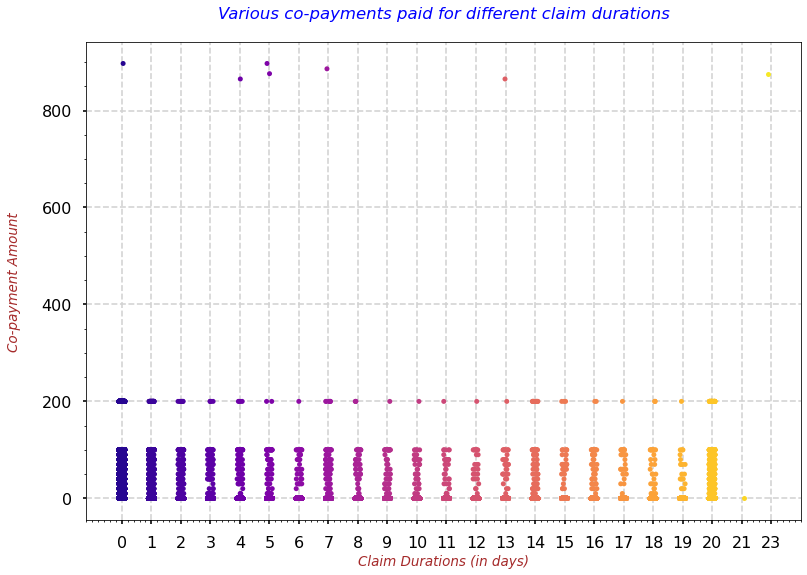

In [67]:
with plt.style.context("seaborn-poster"):
    sns.stripplot(x="Claim_Duration", y="DeductibleAmtPaid", data=train_op_df, palette="plasma")
    # Providing the labels and title to the graph
    plt.xlabel("Claim Durations (in days)", fontdict=label_font_dict)
    plt.ylabel("Co-payment Amount\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Various co-payments paid for different claim durations\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can decude that the trend of co-payment is similar across the various durations, however, there are few co-payment which are very high or more than 800.

### **Q6. What is the relationship b/w Amount of Insurance Claim Reimbursed v/s Claim Clearance Days?**

In [68]:
unq_claim_duration_days = train_op_df['Claim_Duration'].unique()
unq_claim_duration_days

array([ 0, 20, 12,  7, 14,  1, 15,  3,  6,  2, 13,  5,  9, 18, 10, 19, 16,
        4,  8, 17, 11, 23, 21], dtype=int64)

In [69]:
train_op_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Admitted?', 'Claim_Duration'],
      dtype='object')

In [70]:
tot_claims_filed_for_specific_days = pd.DataFrame(train_op_df.groupby(['Claim_Duration'])['ClaimID'].count())
tot_claims_filed_for_specific_days

,ClaimID
Claim_Duration,
0,453348
1,11960
2,4366
3,2597
4,2238
5,1511
6,1306
7,2564
8,1189


In [71]:
tot_insc_amount_for_claim_durations = pd.DataFrame(train_op_df.groupby(['Claim_Duration'])['InscClaimAmtReimbursed'].sum())
tot_insc_amount_for_claim_durations

,InscClaimAmtReimbursed
Claim_Duration,
0,105624910
1,5381060
2,2227230
3,1272800
4,1270910
5,976870
6,571400
7,1280020
8,463190


In [72]:
claim_clearance_amts = pd.merge(left=tot_claims_filed_for_specific_days, right=tot_insc_amount_for_claim_durations,
                                how='inner',
                                left_on=tot_claims_filed_for_specific_days.index,
                                right_on=tot_insc_amount_for_claim_durations.index)

claim_clearance_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']
claim_clearance_amts.head()

,Claim_durations_in_days,Total_claims,All_Claims_Total_Amount
0,0,453348,105624910
1,1,11960,5381060
2,2,4366,2227230
3,3,2597,1272800
4,4,2238,1270910


In [73]:
claim_clearance_amts['Avg_Claim_Insc_Amount'] = np.round(claim_clearance_amts['All_Claims_Total_Amount']/claim_clearance_amts['Total_claims'],2)

In [74]:
claim_clearance_amts.head()

,Claim_durations_in_days,Total_claims,All_Claims_Total_Amount,Avg_Claim_Insc_Amount
0,0,453348,105624910,232.99
1,1,11960,5381060,449.92
2,2,4366,2227230,510.13
3,3,2597,1272800,490.10
4,4,2238,1270910,567.88


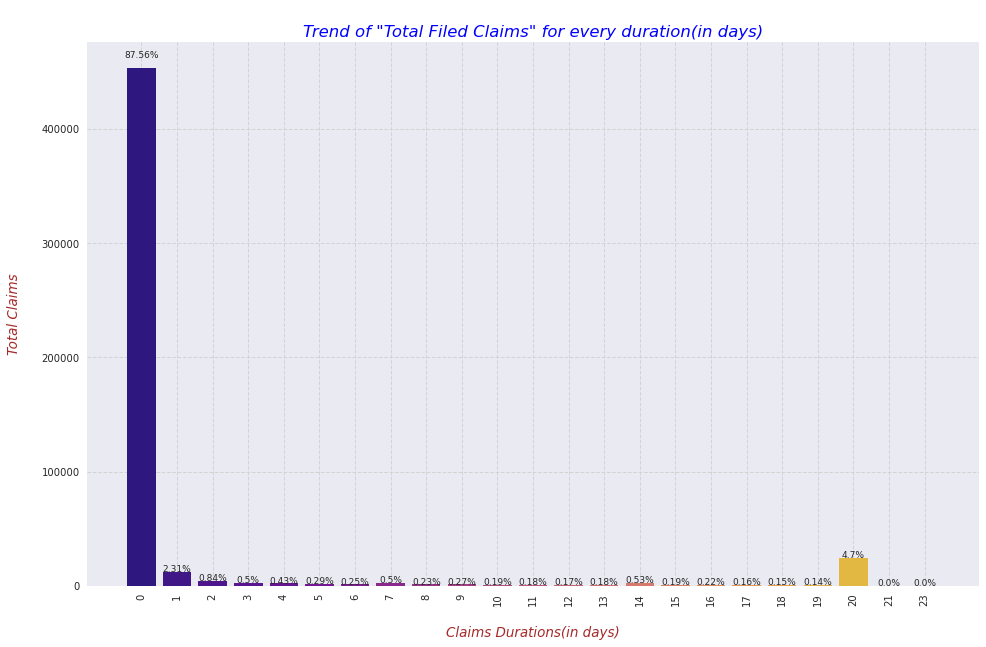

In [75]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,10))
    fig = sns.barplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Total_claims', palette='plasma')     
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/claim_clearance_amts["Total_claims"].sum(),2))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=9, rotation=0)
    
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations(in days)", fontdict= label_font_dict)
    plt.ylabel("Total Claims\n", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Total Filed Claims" for every duration(in days)', fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above graph tells us that the most number of claims are filed for 0 days. And, there are very less number of claims for other durations.
    * However, we can witness a litter spike for 20 days of duration for claims.

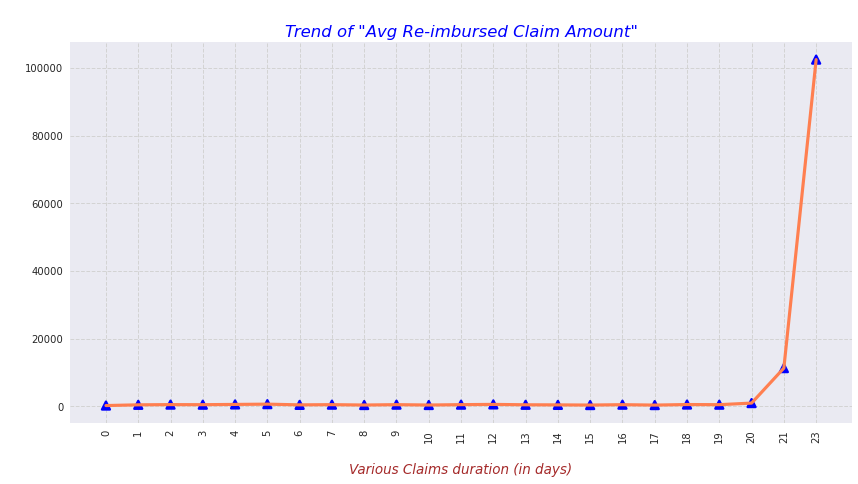

In [76]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='blue', markers="^", linestyles="")
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='coral', markers="", linestyles="-")
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nVarious Claims duration (in days)", fontdict= label_font_dict)
    plt.ylabel(" ", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Avg Re-imbursed Claim Amount"', fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above graph tells us that the Average Re-imbursed Amount is same throughout the various durations except for 21 and 23 days.

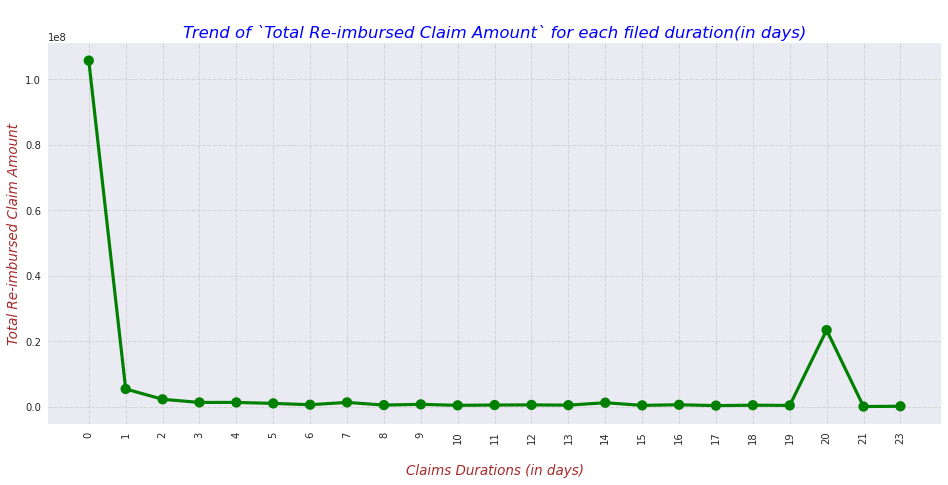

In [77]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='All_Claims_Total_Amount', color='green')
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations (in days)", fontdict= label_font_dict)
    plt.ylabel("Total Re-imbursed Claim Amount", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("\nTrend of `Total Re-imbursed Claim Amount` for each filed duration(in days)", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above graph tells us that the Total Re-imbursed Amount is the highest for 0 days claims.

* And, for claims with durations from 2 to 19 the total re-imbursed amount is very less or similar, however, for 20 days duration we can witness a clear spike that can be a potential sign of fraudulent.

### **Q7. What is the relationship b/w DeductibleAmtPaid and Re-imbursed Amount?**

In [78]:
no_of_claim_with_no_copay = train_op_df[train_op_df['DeductibleAmtPaid'] == 0].shape[0]
no_of_claim_with_no_copay

496701

In [79]:
no_of_claim_with_copay = train_op_df[train_op_df['DeductibleAmtPaid'] != 0].shape[0]
no_of_claim_with_copay

21036

In [80]:
percent_of_no_copay_claims = round((no_of_claim_with_no_copay / (no_of_claim_with_copay + no_of_claim_with_no_copay)) * 100,1)
print("### Percentage of claims with no co-payment or deductible --> {}% ###".format(percent_of_no_copay_claims))

### Percentage of claims with no co-payment or deductible --> 95.9% ###


In [81]:
re_imbursed_amt_for_no_copay = train_op_df[train_op_df['DeductibleAmtPaid'] == 0]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_for_no_copay

142391850

In [82]:
re_imbursed_amt_with_some_copay = train_op_df[train_op_df['DeductibleAmtPaid'] != 0]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_with_some_copay

5854270

In [83]:
tot_sum_of_claims_with_copay = re_imbursed_amt_with_some_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)
tot_sum_of_claims_with_no_copay = re_imbursed_amt_for_no_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)

In [84]:
percent_of_tot_sum_no_copay_claims_amt = round(tot_sum_of_claims_with_no_copay * 100,1)
print("### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> {}% ###".\
      format(percent_of_tot_sum_no_copay_claims_amt))

### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> 96.1% ###


**`OBSERVATION`**
* The above table tells us that there are 95.9% of total claims for which there is no co-payment.
    * And, for these 95.9% of total claims the total re-imbursed amount is 142.3 Million that is 96.1% of the total re-imbursed amount.

### **Q8. What is the relationship of Providers with Total number of claims filed & Re-imbursed Amount?**

In [85]:
# How many unique providers are there in the dataset?
print("We have {} unique number of Providers in the in-patient dataset.".format(train_op_df['Provider'].nunique()))

We have 5012 unique number of Providers in the in-patient dataset.


In [86]:
provider_tot_claims_filed = pd.DataFrame(train_op_df.groupby(['Provider'])['ClaimID'].count())
provider_tot_reimbursed_amt = pd.DataFrame(train_op_df.groupby(['Provider'])['InscClaimAmtReimbursed'].sum())

prv_tot_filed_claims_and_tot_reimb_amt = pd.merge(left=provider_tot_claims_filed, right=provider_tot_reimbursed_amt, how='inner',
                                                  left_on=provider_tot_claims_filed.index, right_on=provider_tot_reimbursed_amt.index)

prv_tot_filed_claims_and_tot_reimb_amt.columns = ['ProviderID', 'Tot_Claims_Filed', 'Tot_Re_Imbursed_Amt']
prv_tot_filed_claims_and_tot_reimb_amt.reset_index(drop=True,inplace=True)
prv_tot_filed_claims_and_tot_reimb_amt['Percentage_out_of_tot_reimb_amt'] = round((prv_tot_filed_claims_and_tot_reimb_amt['Tot_Re_Imbursed_Amt'] / train_op_df['InscClaimAmtReimbursed'].sum()) * 100, 3)

provider_max_reimbursed_amt = pd.DataFrame(train_op_df.groupby(['Provider'])['InscClaimAmtReimbursed'].max())
provider_max_reimbursed_amt.rename(columns={"InscClaimAmtReimbursed": "Max_Re_Imbursed_Amt"}, inplace=True)

prv_tot_filed_claims_tot_max_reimb_amt = pd.merge(left=prv_tot_filed_claims_and_tot_reimb_amt, 
                                                  right=provider_max_reimbursed_amt, how='inner',
                                                  left_on=prv_tot_filed_claims_and_tot_reimb_amt['ProviderID'], 
                                                  right_on=provider_max_reimbursed_amt.index)

prv_tot_filed_claims_tot_max_reimb_amt.drop(['key_0'], axis=1, inplace=True)
prv_tot_filed_claims_tot_max_reimb_amt['Diff_in_Tot_and_Max'] = prv_tot_filed_claims_tot_max_reimb_amt['Tot_Re_Imbursed_Amt'] - \
prv_tot_filed_claims_tot_max_reimb_amt['Max_Re_Imbursed_Amt']

prv_tot_filed_claims_tot_max_reimb_amt.head()

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
0,PRV51001,20,7640,0.005,1500,6140
1,PRV51003,70,32670,0.022,3300,29370
2,PRV51004,149,52170,0.035,3300,48870
3,PRV51005,1165,280910,0.189,4080,276830
4,PRV51007,69,14710,0.010,3300,11410


In [87]:
prv_tot_filed_claims_tot_max_reimb_amt.sort_values(by=['Diff_in_Tot_and_Max','Max_Re_Imbursed_Amt','Percentage_out_of_tot_reimb_amt'],
                                                   axis=0, inplace=True,
                                                   ascending=[True, False, False])

In [88]:
prv_tot_filed_claims_tot_max_reimb_amt.head(60)

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
82,PRV51119,1,95580,0.064,95580,0
2480,PRV54295,1,3300,0.002,3300,0
2485,PRV54302,1,3300,0.002,3300,0
3307,PRV55456,1,3300,0.002,3300,0
433,PRV51577,1,2100,0.001,2100,0
1473,PRV52954,1,2100,0.001,2100,0
4326,PRV56819,1,1900,0.001,1900,0
5010,PRV57762,1,1900,0.001,1900,0
521,PRV51689,1,1700,0.001,1700,0
3430,PRV55610,1,1700,0.001,1700,0


**`OBSERVATION`**
* The above table showing us the Provider Ids who only filed 1 or 2 claims and got the entire amount re-imbursed.
    * This, can be a potential sign of fraudulent because many small-small hospitals in rural area who don't have much facilities or equipments made fraud for benefits. Similar recently happened : refer here https://www.justice.gov/opa/pr/two-individuals-convicted-14-billion-health-care-fraud-scheme-involving-rural-hospitals

In [89]:
tot_re_imb_amt_for_prv_with_5orless_claims = prv_tot_filed_claims_tot_max_reimb_amt[prv_tot_filed_claims_tot_max_reimb_amt['Tot_Claims_Filed'] < 5] \
                                            ['Tot_Re_Imbursed_Amt'].sum()

pp_re_imb_amt_for_prv_with_5orless_claims = round((tot_re_imb_amt_for_prv_with_5orless_claims / train_op_df['InscClaimAmtReimbursed'].sum()) * 100,2)
print("### Total Re-imbursed Amount for Providers with less than 5 filed claims is --> {} (0.52 Million). ###\n\
### And, this is {}% of Total Re-imbursed Claim Amount (148 Million). ###".format(tot_re_imb_amt_for_prv_with_5orless_claims, 
                                                                    pp_re_imb_amt_for_prv_with_5orless_claims))

### Total Re-imbursed Amount for Providers with less than 5 filed claims is --> 522910 (0.52 Million). ###
### And, this is 0.35% of Total Re-imbursed Claim Amount (148 Million). ###


## **`SUMMARY`**

- Features to be added:
    - Claim Duration
    - Admitted Duration
    - Admitted or not?


- Relationships to be validated:
    - Providers <--> Physicians <--> Fraud or not?
    - Providers <--> Physicians <--> Diagnosis and Procedure Codes <--> Fraud or not?
    - Providers with very less number of claims submissions but higher Re-imbursed amount <--> Fraud or not?